Now that I've selected and confirmed all the appropriate variables, the next step is to investigate the data and metadata, and ensure I can harmonise the G0G1 variables with the previous G227 and G228 variables.

## Set up

In [3]:
import banksia as bk
import polars as pl
from pathlib import Path
from fastcore.utils import *
import fastcore.all as fc, numpy as np, matplotlib.pyplot as plt
# import re, math, itertools, functools, types, typing, dataclasses, collections, regex, time, asyncio

In [4]:
pl.Config.set_fmt_str_lengths(150)  # or whatever length you want

polars.config.Config

In [5]:
INPUT = Path("../data/input")
OUTPUT = Path("../data/output")

In [6]:
variables = """G0G1_Q.sav	G0G1	G0G1_BRCA_D1
G0G1_Q.sav	G0G1	G0G1_BRCA_D2
G0G1_Q.sav	G0G1	G0G1_BRCA_D3
G0G1_Q.sav	G0G1	G0G1_BRCA_D4
G0G1_Q.sav	G0G1	G0G1_BRCA_D5
G0G1_Q.sav	G0G1	G0G1_BRCA_MA1
G0G1_Q.sav	G0G1	G0G1_BRCA_MA2
G0G1_Q.sav	G0G1	G0G1_BRCA_MA3
G0G1_Q.sav	G0G1	G0G1_BRCA_MA4
G228_MainQandRQ.sav	G228	G228_AREL
G227_PA.sav	G227	G227_AreL
G0G1_PA.sav	G0G1	G0G1_AREL
G228_MainQandRQ.sav	G228	G228_ARER
G227_PA.sav	G227	G227_AreR
G0G1_PA.sav	G0G1	G0G1_ARER
G228_MainQandRQ.sav	G228	G228_BR_COL
G227_PA.sav	G227	G227_BR_Col
G0G1_PA.sav	G0G1	G0G1_BR_COL
G228_MainQandRQ.sav	G228	G228_BR1
G227_PA.sav	G227	G227_BR1
G228_MainQandRQ.sav	G228	G228_BR1_AGE
G227_PA.sav	G227	G227_BR1_AGE
G228_MainQandRQ.sav	G228	G228_BR2
G227_PA.sav	G227	G227_BR2
G228_MainQandRQ.sav	G228	G228_BR2_AGE
G227_PA.sav	G227	G227_BR2_AGE
G228_MainQandRQ.sav	G228	G228_BR3
G227_PA.sav	G227	G227_BR3
G228_MainQandRQ.sav	G228	G228_BR3_AGE
G227_PA.sav	G227	G227_BR3_AGE
G228_MainQandRQ.sav	G228	G228_BR4
G227_PA.sav	G227	G227_BR4
G228_MainQandRQ.sav	G228	G228_BR4_AGE
G227_PA.sav	G227	G227_BR4_AGE
G228_MainQandRQ.sav	G228	G228_BR4_SD
G227_PA.sav	G227	G227_BR4_SD
G228_MainQandRQ.sav	G228	G228_BR5
G227_PA.sav	G227	G227_BR5
G228_MainQandRQ.sav	G228	G228_BR5_AGE
G227_PA.sav	G227	G227_BR5_AGE
G228_MainQandRQ.sav	G228	G228_BR5_SD
G227_PA.sav	G227	G227_BR5_SD
G228_MainQandRQ.sav	G228	G228_BR6
G227_PA.sav	G227	G227_BR6
G228_MainQandRQ.sav	G228	G228_BR6_AGE
G227_PA.sav	G227	G227_BR6_AGE
G228_MainQandRQ.sav	G228	G228_BR6_SD
G227_PA.sav	G227	G227_BR6_SD
G0G1_Q.sav	G0G1	G0G1_BRC_D1
G0G1_Q.sav	G0G1	G0G1_BRC_D2
G0G1_Q.sav	G0G1	G0G1_BRC_D3
G0G1_Q.sav	G0G1	G0G1_BRC_D4
G0G1_Q.sav	G0G1	G0G1_BRC_D5
G0G1_Q.sav	G0G1	G0G1_BRC_MA1
G0G1_Q.sav	G0G1	G0G1_BRC_MA2
G0G1_Q.sav	G0G1	G0G1_BRC_MA3
G0G1_Q.sav	G0G1	G0G1_BRC_MA4
G0G1_Q.sav	G0G1	G0G1_BRC_MA5
G0G1_Q.sav	G0G1	G0G1_BRC_MG
G0G1_Q.sav	G0G1	G0G1_BRC_MO
G0G1_Q.sav	G0G1	G0G1_BRC_PA1
G0G1_Q.sav	G0G1	G0G1_BRC_PA2
G0G1_Q.sav	G0G1	G0G1_BRC_PA3
G0G1_Q.sav	G0G1	G0G1_BRC_PA4
G0G1_Q.sav	G0G1	G0G1_BRC_PA5
G0G1_Q.sav	G0G1	G0G1_BRC_PG
G0G1_Q.sav	G0G1	G0G1_BRC_S1
G0G1_Q.sav	G0G1	G0G1_BRC_S2
G0G1_Q.sav	G0G1	G0G1_BRC_S3
G0G1_Q.sav	G0G1	G0G1_BRC_S4
G0G1_Q.sav	G0G1	G0G1_BRC_S5
G0G1_Q.sav	G0G1	G0G1_BRCA_MA5
G0G1_Q.sav	G0G1	G0G1_BRCA_MG
G0G1_Q.sav	G0G1	G0G1_BRCA_MO
G0G1_Q.sav	G0G1	G0G1_BRCA_PA1
G0G1_Q.sav	G0G1	G0G1_BRCA_PA2
G0G1_Q.sav	G0G1	G0G1_BRCA_PA3
G0G1_Q.sav	G0G1	G0G1_BRCA_PA4
G0G1_Q.sav	G0G1	G0G1_BRCA_PA5
G0G1_Q.sav	G0G1	G0G1_BRCA_PG
G0G1_Q.sav	G0G1	G0G1_BRCA_S1
G0G1_Q.sav	G0G1	G0G1_BRCA_S2
G0G1_Q.sav	G0G1	G0G1_BRCA_S3
G0G1_Q.sav	G0G1	G0G1_BRCA_S4
G0G1_Q.sav	G0G1	G0G1_BRCA_S5
G0G1_Q.sav	G0G1	G0G1_BRS3
G0G1_Q.sav	G0G1	G0G1_BRS5
G0G1_Q.sav	G0G1	G0G1_BRS6
G0G1_Q.sav	G0G1	G0G1_BRS7
G0G1_Q.sav	G0G1	G0G1_BRSA5
G0G1_Q.sav	G0G1	G0G1_BRSA6_1
G0G1_Q.sav	G0G1	G0G1_BRSA6_2
G0G1_Q.sav	G0G1	G0G1_BRSA7
G0G1_Q.sav	G0G1	G0G1_BRSS5
G228_MainQandRQ.sav	G228	G228_BROC
G227_PA.sav	G227	G227_BROC
G227_PA.sav	G227	G227_BROC_COM
G0G1_Q.sav	G0G1	G0G1_BRS1
G0G1_Q.sav	G0G1	G0G1_BRS2
G0G1_Q.sav	G0G1	G0G1_BRSS7
G0G1_Q.sav	G0G1	G0G1_BRS4
G0G1_Q.sav	G0G1	G0G1_BRSA3
G0G1_Q.sav	G0G1	G0G1_BRSA4_1
G0G1_Q.sav	G0G1	G0G1_BRSA4_2
G0G1_Q.sav	G0G1	G0G1_BRSA4_3
G0G1_Q.sav	G0G1	G0G1_BRSS4_1
G0G1_Q.sav	G0G1	G0G1_BRSS4_2
G0G1_Q.sav	G0G1	G0G1_BRSS4_3
G0G1_Q.sav	G0G1	G0G1_BRSS6_1
G0G1_Q.sav	G0G1	G0G1_BRSS6_2
G0G1_Q.sav	G0G1	G0G1_OVCA_D1
G0G1_Q.sav	G0G1	G0G1_OVCA_D2
G0G1_Q.sav	G0G1	G0G1_OVCA_D3
G0G1_Q.sav	G0G1	G0G1_OVCA_D4
G0G1_Q.sav	G0G1	G0G1_OVCA_D5
G0G1_Q.sav	G0G1	G0G1_OVCA_MA1
G0G1_Q.sav	G0G1	G0G1_OVCA_MA2
G0G1_Q.sav	G0G1	G0G1_OVCA_MA3
G0G1_Q.sav	G0G1	G0G1_OVCA_MA4
G0G1_Q.sav	G0G1	G0G1_OVCA_MA5
G0G1_Q.sav	G0G1	G0G1_OVCA_MG
G0G1_Q.sav	G0G1	G0G1_OVCA_MO
G0G1_Q.sav	G0G1	G0G1_OVCA_PA1
G0G1_Q.sav	G0G1	G0G1_OVCA_PA2
G0G1_Q.sav	G0G1	G0G1_OVCA_PA3
G0G1_Q.sav	G0G1	G0G1_OVCA_PA4
G0G1_Q.sav	G0G1	G0G1_OVCA_PA5
G0G1_Q.sav	G0G1	G0G1_OVCA_PG
G0G1_Q.sav	G0G1	G0G1_OVCA_S1
G0G1_Q.sav	G0G1	G0G1_OVCA_S2
G0G1_Q.sav	G0G1	G0G1_OVCA_S3
G0G1_Q.sav	G0G1	G0G1_OVCA_S4
G0G1_Q.sav	G0G1	G0G1_OVCA_S5
G0G1_Q.sav	G0G1	G0G1_FH_BROV
G227_PA.sav	G227	G227_MA1_AGE
G228_MainQandRQ.sav	G228	G228_MA1_BRC
G227_PA.sav	G227	G227_MA1_BRC
G228_MainQandRQ.sav	G228	G228_MA1_OC
G227_PA.sav	G227	G227_MA1_OC
G227_PA.sav	G227	G227_MA2_AGE
G228_MainQandRQ.sav	G228	G228_MA2_BRC
G227_PA.sav	G227	G227_MA2_BRC
G228_MainQandRQ.sav	G228	G228_MA2_OC
G227_PA.sav	G227	G227_MA2_OC
G227_PA.sav	G227	G227_MG_AGE
G228_MainQandRQ.sav	G228	G228_MG_BRC
G227_PA.sav	G227	G227_MG_BRC
G228_MainQandRQ.sav	G228	G228_MG_OC
G227_PA.sav	G227	G227_MG_OC
G227_PA.sav	G227	G227_MO_AGE
G228_MainQandRQ.sav	G228	G228_MO_BRC
G227_PA.sav	G227	G227_MO_BRC
G228_MainQandRQ.sav	G228	G228_MO_OC
G227_PA.sav	G227	G227_MO_OC
G228_MainQandRQ.sav	G228	G228_OR1_BRC
G228_MainQandRQ.sav	G228	G228_OR1_BRC_OTH
G228_MainQandRQ.sav	G228	G228_OR1_OC
G228_MainQandRQ.sav	G228	G228_OR1_OC_OTH
G228_MainQandRQ.sav	G228	G228_OR2_BRC
G228_MainQandRQ.sav	G228	G228_OR2_BRC_OTH
G0G1_Q.sav	G0G1	G0G1_OVC_D1
G0G1_Q.sav	G0G1	G0G1_OVC_D2
G0G1_Q.sav	G0G1	G0G1_OVC_D3
G0G1_Q.sav	G0G1	G0G1_OVC_D4
G0G1_Q.sav	G0G1	G0G1_OVC_D5
G0G1_Q.sav	G0G1	G0G1_OVC_MA1
G0G1_Q.sav	G0G1	G0G1_OVC_MA2
G0G1_Q.sav	G0G1	G0G1_OVC_MA3
G0G1_Q.sav	G0G1	G0G1_OVC_MA4
G0G1_Q.sav	G0G1	G0G1_OVC_MA5
G0G1_Q.sav	G0G1	G0G1_OVC_MG
G0G1_Q.sav	G0G1	G0G1_OVC_MO
G0G1_Q.sav	G0G1	G0G1_OVC_PA1
G0G1_Q.sav	G0G1	G0G1_OVC_PA2
G0G1_Q.sav	G0G1	G0G1_OVC_PA3
G0G1_Q.sav	G0G1	G0G1_OVC_PA4
G0G1_Q.sav	G0G1	G0G1_OVC_PA5
G0G1_Q.sav	G0G1	G0G1_OVC_PG
G0G1_Q.sav	G0G1	G0G1_OVC_S1
G0G1_Q.sav	G0G1	G0G1_OVC_S2
G0G1_Q.sav	G0G1	G0G1_OVC_S3
G0G1_Q.sav	G0G1	G0G1_OVC_S4
G0G1_Q.sav	G0G1	G0G1_OVC_S5
G227_PA.sav	G227	G227_PA1_AGE
G228_MainQandRQ.sav	G228	G228_PA1_BRC
G227_PA.sav	G227	G227_PA1_BRC
G228_MainQandRQ.sav	G228	G228_PA1_OC
G227_PA.sav	G227	G227_PA1_OC
G227_PA.sav	G227	G227_PA2_AGE
G228_MainQandRQ.sav	G228	G228_PA2_BRC
G227_PA.sav	G227	G227_PA2_BRC
G228_MainQandRQ.sav	G228	G228_PA2_OC
G227_PA.sav	G227	G227_PA2_OC
G227_PA.sav	G227	G227_PG_AGE
G228_MainQandRQ.sav	G228	G228_PG_BRC
G227_PA.sav	G227	G227_PG_BRC
G228_MainQandRQ.sav	G228	G228_PG_OC
G227_PA.sav	G227	G227_PG_OC
G228_MainQandRQ.sav	G228	G228_PIER
G0G1_PA.sav	G0G1	G0G1_PIER
G228_MainQandRQ.sav	G228	G228_PIERL
G227_PA.sav	G227	G227_PIERL
G0G1_PA.sav	G0G1	G0G1_PIERL
G228_MainQandRQ.sav	G228	G228_PIERR
G227_PA.sav	G227	G227_PIERR
G0G1_PA.sav	G0G1	G0G1_PIERR
G0G1_Q.sav	G0G1	G0G1_REL_DAU
G0G1_Q.sav	G0G1	G0G1_REL_MA
G0G1_Q.sav	G0G1	G0G1_REL_PA
G0G1_Q.sav	G0G1	G0G1_REL_SIS
G228_MainQandRQ.sav	G228	G228_SCAR_LC
G0G1_PA.sav	G0G1	G0G1_SCAR_LC
G228_MainQandRQ.sav	G228	G228_SCAR_LLIQ
G0G1_PA.sav	G0G1	G0G1_SCAR_LLIQ
G228_MainQandRQ.sav	G228	G228_SCAR_LLOQ
G0G1_PA.sav	G0G1	G0G1_SCAR_LLOQ
G228_MainQandRQ.sav	G228	G228_SCAR_LUIQ
G0G1_PA.sav	G0G1	G0G1_SCAR_LUIQ
G228_MainQandRQ.sav	G228	G228_SCAR_LUOQ
G0G1_PA.sav	G0G1	G0G1_SCAR_LUOQ
G228_MainQandRQ.sav	G228	G228_SCAR_RC
G0G1_PA.sav	G0G1	G0G1_SCAR_RC
G228_MainQandRQ.sav	G228	G228_SCAR_RLIQ
G0G1_PA.sav	G0G1	G0G1_SCAR_RLIQ
G228_MainQandRQ.sav	G228	G228_SCAR_RLOQ
G0G1_PA.sav	G0G1	G0G1_SCAR_RLOQ
G228_MainQandRQ.sav	G228	G228_SCAR_RUIQ
G0G1_PA.sav	G0G1	G0G1_SCAR_RUIQ
G228_MainQandRQ.sav	G228	G228_SCAR_RUOQ
G0G1_PA.sav	G0G1	G0G1_SCAR_RUOQ
G228_MainQandRQ.sav	G228	G228_SCARL
G227_PA.sav	G227	G227_SCARL
G0G1_PA.sav	G0G1	G0G1_SCARL
G228_MainQandRQ.sav	G228	G228_SCARS
G227_PA.sav	G227	G227_SCARS
G0G1_PA.sav	G0G1	G0G1_SCARS
G228_MainQandRQ.sav	G228	G228_SCARW
G227_PA.sav	G227	G227_SCARW
G0G1_PA.sav	G0G1	G0G1_SCARW
G228_MainQandRQ.sav	G228	G228_MA1_BRC_AGE
G228_MainQandRQ.sav	G228	G228_MA1_OC_AGE
G228_MainQandRQ.sav	G228	G228_MA2_BRC_AGE
G228_MainQandRQ.sav	G228	G228_MA2_OC_AGE
G228_MainQandRQ.sav	G228	G228_MG_BRC_AGE
G228_MainQandRQ.sav	G228	G228_MG_OC_AGE
G228_MainQandRQ.sav	G228	G228_MO_BRC_AGE
G228_MainQandRQ.sav	G228	G228_MO_OC_AGE
G228_MainQandRQ.sav	G228	G228_OR1_BRC_AGE
G228_MainQandRQ.sav	G228	G228_OR1_OC_AGE
G228_MainQandRQ.sav	G228	G228_OR2_BRC_AGE
G228_MainQandRQ.sav	G228	G228_PA1_BRC_AGE
G228_MainQandRQ.sav	G228	G228_PA1_OC_AGE
G228_MainQandRQ.sav	G228	G228_PA2_BRC_AGE
G228_MainQandRQ.sav	G228	G228_PA2_OC_AGE
G228_MainQandRQ.sav	G228	G228_PG_BRC_AGE
G228_MainQandRQ.sav	G228	G228_PG_OC_AGE
G227_PA.sav	G227	G227_SIS1_AGE
G228_MainQandRQ.sav	G228	G228_SIS1_BRC
G227_PA.sav	G227	G227_SIS1_BRC
G228_MainQandRQ.sav	G228	G228_SIS1_OC
G227_PA.sav	G227	G227_SIS1_OC
G227_PA.sav	G227	G227_SIS2_AGE
G228_MainQandRQ.sav	G228	G228_SIS2_BRC
G227_PA.sav	G227	G227_SIS2_BRC
G228_MainQandRQ.sav	G228	G228_SIS2_OC
G227_PA.sav	G227	G227_SIS2_OC
G227_PA.sav	G227	G227_SIS3_AGE
G228_MainQandRQ.sav	G228	G228_SIS3_BRC
G227_PA.sav	G227	G227_SIS3_BRC
G228_MainQandRQ.sav	G228	G228_SIS3_OC
G227_PA.sav	G227	G227_SIS3_OC
G228_MainQandRQ.sav	G228	G228_SIS1_BRC_AGE
G228_MainQandRQ.sav	G228	G228_SIS1_OC_AGE
G228_MainQandRQ.sav	G228	G228_SIS2_BRC_AGE
G228_MainQandRQ.sav	G228	G228_SIS2_OC_AGE
G228_MainQandRQ.sav	G228	G228_SIS3_BRC_AGE
G228_MainQandRQ.sav	G228	G228_SIS3_OC_AGE
G228_MainQandRQ.sav	G228	G228_TATT
G227_PA.sav	G227	G227_TATT
G0G1_PA.sav	G0G1	G0G1_TATT
G228_MainQandRQ.sav	G228	G228_TATT_LC
G0G1_PA.sav	G0G1	G0G1_TATT_LC
G228_MainQandRQ.sav	G228	G228_TATT_LLIQ
G0G1_PA.sav	G0G1	G0G1_TATT_LLIQ
G228_MainQandRQ.sav	G228	G228_TATT_LLOQ
G0G1_PA.sav	G0G1	G0G1_TATT_LLOQ
G228_MainQandRQ.sav	G228	G228_TATT_LUIQ
G0G1_PA.sav	G0G1	G0G1_TATT_LUIQ
G228_MainQandRQ.sav	G228	G228_TATT_LUOQ
G0G1_PA.sav	G0G1	G0G1_TATT_LUOQ
G228_MainQandRQ.sav	G228	G228_TATT_RC
G0G1_PA.sav	G0G1	G0G1_TATT_RC
G228_MainQandRQ.sav	G228	G228_TATT_RLIQ
G0G1_PA.sav	G0G1	G0G1_TATT_RLIQ
G228_MainQandRQ.sav	G228	G228_TATT_RLOQ
G0G1_PA.sav	G0G1	G0G1_TATT_RLOQ
G228_MainQandRQ.sav	G228	G228_TATT_RUIQ
G0G1_PA.sav	G0G1	G0G1_TATT_RUIQ
G228_MainQandRQ.sav	G228	G228_TATT_RUOQ
G0G1_PA.sav	G0G1	G0G1_TATT_RUOQ
G228_MainQandRQ.sav	G228	G228_TATTL
G227_PA.sav	G227	G227_TATTL
G0G1_PA.sav	G0G1	G0G1_TATTL
G228_MainQandRQ.sav	G228	G228_TATTW
G227_PA.sav	G227	G227_TATTW
G0G1_PA.sav	G0G1	G0G1_TATTW
G227_PA.sav	G227	G227_TiBs_COM
G0G1_PA.sav	G0G1	G0G1_TIBS_COM"""

In [7]:
def parse_variables(text):
    lines = [line.split("\t") for line in text.splitlines()]
    return pl.DataFrame(lines, schema={"File": str, "Dataset": str, "Variable": str}, orient="row")

In [8]:
value_labels = parse_variables(variables)
value_labels.head()

File,Dataset,Variable
str,str,str
"""G0G1_Q.sav""","""G0G1""","""G0G1_BRCA_D1"""
"""G0G1_Q.sav""","""G0G1""","""G0G1_BRCA_D2"""
"""G0G1_Q.sav""","""G0G1""","""G0G1_BRCA_D3"""
"""G0G1_Q.sav""","""G0G1""","""G0G1_BRCA_D4"""
"""G0G1_Q.sav""","""G0G1""","""G0G1_BRCA_D5"""


How can I alter this DataFrame such that each unique file is a single row, and I convert all the respective variables for the file into a single list? I'm assuming `groupby` and then `agg` come into play, but I'm not quite sure how to apply them here.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're on exactly the right track! In Polars, you'd use `group_by` followed by `agg`, and the key is using the `.list()` expression to collect values into a list.

The pattern looks like:

```python
df.group_by("File").agg(pl.col("Variable").list())
```

Give that a try and see if it produces what you're expecting!

In [9]:
vl = value_labels.group_by("File").agg(pl.col("Variable"))
vl

File,Variable
str,list[str]
"""G227_PA.sav""","[""G227_AreL"", ""G227_AreR"", … ""G227_TiBs_COM""]"
"""G228_MainQandRQ.sav""","[""G228_AREL"", ""G228_ARER"", … ""G228_TATTW""]"
"""G0G1_PA.sav""","[""G0G1_AREL"", ""G0G1_ARER"", … ""G0G1_TIBS_COM""]"
"""G0G1_Q.sav""","[""G0G1_BRCA_D1"", ""G0G1_BRCA_D2"", … ""G0G1_REL_SIS""]"


In [10]:
vl.to_dict(as_series=False)

{'File': ['G227_PA.sav', 'G228_MainQandRQ.sav', 'G0G1_PA.sav', 'G0G1_Q.sav'],
 'Variable': [['G227_AreL',
   'G227_AreR',
   'G227_BR_Col',
   'G227_BR1',
   'G227_BR1_AGE',
   'G227_BR2',
   'G227_BR2_AGE',
   'G227_BR3',
   'G227_BR3_AGE',
   'G227_BR4',
   'G227_BR4_AGE',
   'G227_BR4_SD',
   'G227_BR5',
   'G227_BR5_AGE',
   'G227_BR5_SD',
   'G227_BR6',
   'G227_BR6_AGE',
   'G227_BR6_SD',
   'G227_BROC',
   'G227_BROC_COM',
   'G227_MA1_AGE',
   'G227_MA1_BRC',
   'G227_MA1_OC',
   'G227_MA2_AGE',
   'G227_MA2_BRC',
   'G227_MA2_OC',
   'G227_MG_AGE',
   'G227_MG_BRC',
   'G227_MG_OC',
   'G227_MO_AGE',
   'G227_MO_BRC',
   'G227_MO_OC',
   'G227_PA1_AGE',
   'G227_PA1_BRC',
   'G227_PA1_OC',
   'G227_PA2_AGE',
   'G227_PA2_BRC',
   'G227_PA2_OC',
   'G227_PG_AGE',
   'G227_PG_BRC',
   'G227_PG_OC',
   'G227_PIERL',
   'G227_PIERR',
   'G227_SCARL',
   'G227_SCARS',
   'G227_SCARW',
   'G227_SIS1_AGE',
   'G227_SIS1_BRC',
   'G227_SIS1_OC',
   'G227_SIS2_AGE',
   'G227_SIS2_BRC',

In [11]:
file, cols = vl.row(0)
file, cols[:5]

('G227_PA.sav',
 ['G227_AreL', 'G227_AreR', 'G227_BR_Col', 'G227_BR1', 'G227_BR1_AGE'])

In [12]:
df, m = bk.read_sav(INPUT/file, usecols=cols)

In [13]:
df.head()

G227_BR1,G227_BR1_AGE,G227_BR2,G227_BR2_AGE,G227_BR3,G227_BR3_AGE,G227_BR4,G227_BR4_AGE,G227_BR4_SD,G227_BR5,G227_BR5_AGE,G227_BR5_SD,G227_BR6,G227_BR6_AGE,G227_BR6_SD,G227_BROC,G227_BROC_COM,G227_MO_BRC,G227_MO_OC,G227_MO_AGE,G227_SIS1_BRC,G227_SIS1_OC,G227_SIS1_AGE,G227_SIS2_BRC,G227_SIS2_OC,G227_SIS2_AGE,G227_SIS3_BRC,G227_SIS3_OC,G227_SIS3_AGE,G227_MA1_BRC,G227_MA1_OC,G227_MA1_AGE,G227_MA2_BRC,G227_MA2_OC,G227_MA2_AGE,G227_PA1_BRC,G227_PA1_OC,G227_PA1_AGE,G227_PA2_BRC,G227_PA2_OC,G227_PA2_AGE,G227_MG_BRC,G227_MG_OC,G227_MG_AGE,G227_PG_BRC,G227_PG_OC,G227_PG_AGE,G227_AreR,G227_AreL,G227_SCARS,G227_SCARW,G227_SCARL,G227_TATT,G227_TATTW,G227_TATTL,G227_PIERR,G227_PIERL,G227_BR_Col,G227_TiBs_COM
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,""""""
0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,888.0,-88.0,0.0,-88.0,-88.0,0.0,"""Relatives could be interpred as extended family or distant relatives ex. Cousins (the variable created during clean-up)""",-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,888.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,3.0,3.2,0.0,-88.0,-88.0,0.0,-88.0,-88.0,0.0,0.0,1.0,"""Great Grandmother had breast cancer"""
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,""""""
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,""""""
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,""""""


In [14]:
m.head()

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G227_BR1""","""Breast reduction surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"""""
"""G227_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G227_BR2""","""Breast enlargement surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"""""
"""G227_BR2_AGE""","""Breast enlargement surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G227_BR3""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"""""


For the next step, we'll merge the datasets and metadata together, and begin exploring subsets of these variables

In [15]:
def merge(vl: pl.DataFrame, dir: str|Path=INPUT) -> tuple[pl.DataFrame, pl.DataFrame]:
    dfs, ms = [], []
    for r in vl.rows():
        file, cols = r
        df, m = bk.read_sav(dir/file, usecols=["ID"] + cols)
        dfs.append(df), ms.append(m)
    df = pl.concat(dfs, how="align")
    m = pl.concat(ms, how="vertical").filter(pl.col("Variable").ne("ID")).with_columns(basename=pl.col("Variable").str.slice(5))
    return df, m

## Medical and Surgical History

In [16]:
df, m = merge(vl)

### Screenshots of questions from proforma

G227

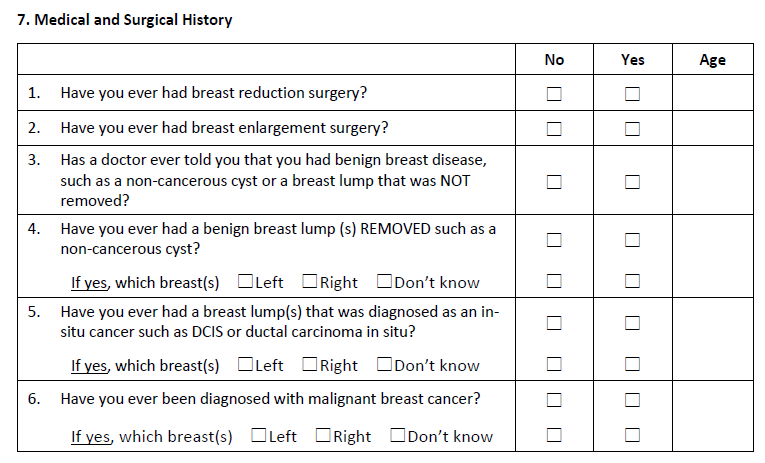


G228

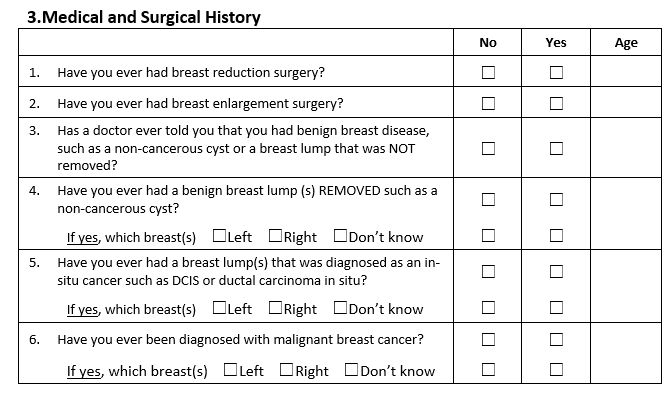

G0G1

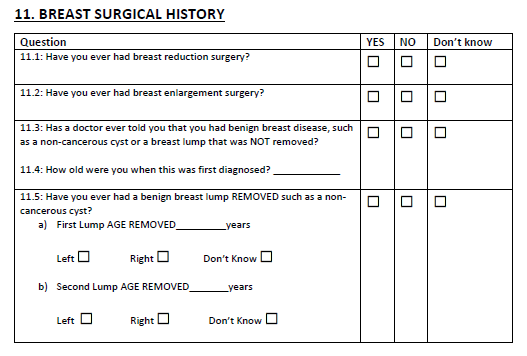
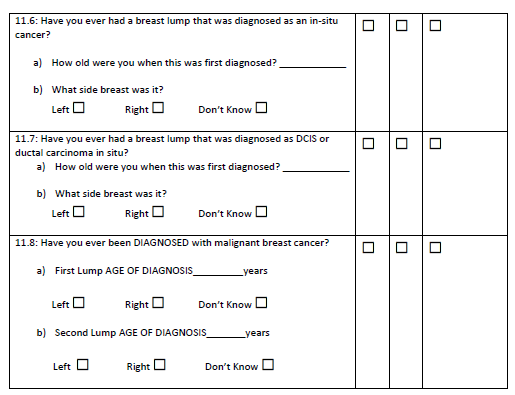

So we can immediately see that G227 and G228 were identical, but there were minor differences introduced in G0G1, namely:

- "Don't know" was an option for *all* questions
- "Age" was not asked for *all*
- For "benign breast lump removed" and "diagnosed with malignant cancer", there were options for first and second lump
- "Breast lump diagnosed as 'in-situ' and 'DCIS or ductal carcinoma'" were split into two separate questions

This should be generally harmonisable, but with the last point, they won't be harmonised, given it's been split into two questions.

### Investigating the data

In [17]:
cols = """G227_BR1
G227_BR1_AGE
G227_BR2
G227_BR2_AGE
G227_BR3
G227_BR3_AGE
G227_BR4
G227_BR4_AGE
G227_BR4_SD
G227_BR5
G227_BR5_AGE
G227_BR5_SD
G227_BR6
G227_BR6_AGE
G227_BR6_SD
G228_BR1
G228_BR1_AGE
G228_BR2
G228_BR2_AGE
G228_BR3
G228_BR3_AGE
G228_BR4
G228_BR4_AGE
G228_BR4_SD
G228_BR5
G228_BR5_AGE
G228_BR5_SD
G228_BR6
G228_BR6_AGE
G0G1_BRS1
G0G1_BRS2
G0G1_BRS3
G0G1_BRSA3
G0G1_BRS4
G0G1_BRSA4_1
G0G1_BRSA4_2
G0G1_BRSA4_3
G0G1_BRSS4_1
G0G1_BRSS4_2
G0G1_BRSS4_3
G0G1_BRS5
G0G1_BRSA5
G0G1_BRSS5
G0G1_BRS7
G0G1_BRSA7
G0G1_BRSS7
G0G1_BRS6
G0G1_BRSA6_1
G0G1_BRSA6_2
G0G1_BRSS6_1
G0G1_BRSS6_2"""

In [18]:
cols = cols.splitlines()
cols[:5]

['G227_BR1', 'G227_BR1_AGE', 'G227_BR2', 'G227_BR2_AGE', 'G227_BR3']

In [19]:
m = m.filter(pl.col("Variable").is_in(cols))
m.head()

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR1""","""Breast reduction surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR1"""
"""G227_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR1_AGE"""
"""G227_BR2""","""Breast enlargement surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR2"""
"""G227_BR2_AGE""","""Breast enlargement surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR2_AGE"""
"""G227_BR3""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR3"""


In [20]:
df = df.select(cols)
df.describe()

statistic,G227_BR1,G227_BR1_AGE,G227_BR2,G227_BR2_AGE,G227_BR3,G227_BR3_AGE,G227_BR4,G227_BR4_AGE,G227_BR4_SD,G227_BR5,G227_BR5_AGE,G227_BR5_SD,G227_BR6,G227_BR6_AGE,G227_BR6_SD,G228_BR1,G228_BR1_AGE,G228_BR2,G228_BR2_AGE,G228_BR3,G228_BR3_AGE,G228_BR4,G228_BR4_AGE,G228_BR4_SD,G228_BR5,G228_BR5_AGE,G228_BR5_SD,G228_BR6,G228_BR6_AGE,G0G1_BRS1,G0G1_BRS2,G0G1_BRS3,G0G1_BRSA3,G0G1_BRS4,G0G1_BRSA4_1,G0G1_BRSA4_2,G0G1_BRSA4_3,G0G1_BRSS4_1,G0G1_BRSS4_2,G0G1_BRSS4_3,G0G1_BRS5,G0G1_BRSA5,G0G1_BRSS5,G0G1_BRS7,G0G1_BRSA7,G0G1_BRSS7,G0G1_BRS6,G0G1_BRSA6_1,G0G1_BRSA6_2,G0G1_BRSS6_1,G0G1_BRSS6_2
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,542.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0,573.0
"""null_count""",2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,2913.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,3019.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0,2882.0
"""mean""",0.009225,-87.212177,-0.138376,-81.45203,-0.308118,-83.255535,-0.531365,-87.798893,-86.738007,-0.361624,888.819188,-87.701107,-0.180812,-88.04059,-87.845018,-1.123853,-86.860092,-0.633028,-84.15367,-0.834862,-81.942661,-1.568807,-87.013761,-86.772936,-1.362385,-88.151376,-88.151376,-1.362385,-88.151376,0.082024,0.099476,0.303665,753.315881,0.17103,859.059337,887.211169,888.678883,7.69459,7.99651,8.006981,0.232112,889.247818,7.874346,0.296684,888.162304,7.74171,0.235602,889.635253,891.099476,7.975567,8.027923
"""std""",0.095692,9.402344,4.259299,88.117929,6.016236,23.005539,7.354123,6.824047,11.037894,6.008792,9.509241,5.628614,4.25271,0.667585,4.108731,10.554654,11.849484,8.199984,20.86325,9.460397,25.867548,12.460783,11.909806,11.534907,11.546681,1.282965,1.282965,11.546681,1.282965,0.767733,0.919229,1.124398,306.755625,1.020112,160.61561,51.797067,38.035016,1.472091,0.409658,0.3238,1.314343,39.123321,1.09109,1.428704,53.110419,1.487579,1.397546,39.655967,18.303546,0.652668,0.164897
"""min""",0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,888.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,0.0,18.0,0.0,16.0,51.0,56.0,0.0,1.0,1.0,0.0,49.0,0.0,0.0,40.0,0.0,0.0,49.0,888.0,0.0,8.0
"""25%""",0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,888.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,0.0,0.0,888.0,0.0,888.0,888.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,0.0,888.0,8.0,0.0,888.0,888.0,8.0,8.0
"""50%""",0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,888.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,0.0,0.0,888.0,0.0,888.0,888.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,0.0,888.0,8.0,0.0,888.0,888.0,8.0,8.0
"""75%""",0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,888.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,-88.0,0.0,-88.0,0.0,0.0,0.0,888.0,0.0,888.0,888.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,0.0,888.0,8.0,0.0,888.0,888.0,8.0,8.0
"""max""",1.0,26.0,1.0,1923.0,1.0,27.0,1.0,25.0,7.0,1.0,999.0,7.0,1.0,-88.0,7.0,1.0,27.0,1.0,28.0,1.0,28.0,1.0,29.0,7.0,0.0,-88.0,-88.0,0.0,-88.0,9.0,9.0,9.0,999.0,9.0,999.0,999.0,999.0,9.0,9.0,9.0,9.0,999.0,9.0,9.0,999.0,9.0,9.0,999.0,999.0,9.0,9.0


How do you suggest we proceed from here? I want to ensure these variables are harmonised whre possible (set the variable basename (without the prefix of "G227_", "G228_", "G0G1_") to be consistent *iff* the question and the options to answer that question are semantically identical).

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

This is a great harmonization challenge! Based on the screenshots and metadata, I can see there are different levels of compatibility. Here's how I'd suggest approaching it:

**Step 1: Create a mapping document**

First, explicitly map which questions correspond across datasets. From the screenshots, the rough correspondence seems to be:

| G227/G228 | G0G1 | Notes |
|-----------|------|-------|
| BR1 | BRS1 | Reduction surgery - but G0G1 adds "Don't know" option |
| BR2 | BRS2 | Enlargement surgery - same caveat |
| BR3 | BRS3/BRSA3 | Benign disease - G0G1 splits age into separate var |
| BR4 | BRS4/BRSA4_*/BRSS4_* | Benign lump removed - G0G1 allows multiple lumps |
| BR5 | BRS5 + BRS7? | In-situ/DCIS - G0G1 splits into two questions |
| BR6 | BRS6/BRSA6_*/BRSS6_* | Malignant cancer - G0G1 allows multiple diagnoses |

**Step 2: Decide on harmonization rules**

Some questions to consider:
- For questions where G0G1 added "Don't know" (value 2): Is that harmonizable if you treat "Don't know" as a distinct value or recode it to missing?
- For split variables (like BR5 → BRS5 + BRS7): Do you want to flag these as non-harmonizable, or create a derived combined variable?

Would you like to start by building out that mapping table in code, so you can then systematically check the `Field Values` for each pair to confirm semantic equivalence?

Let's start analysing one variable at a time, and explore how "don't know" was used.
Then we can figure out if it makes sense to keep these variables separated, or if we can harmonise them.

In [21]:
m.filter(pl.col("Variable").str.contains("BRS?1"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR1""","""Breast reduction surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR1"""
"""G227_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR1_AGE"""
"""G228_BR1""","""Breast reduction surgery: ever""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR1"""
"""G228_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR1_AGE"""
"""G0G1_BRS1""","""Breast Surgery: Ever breast reduction surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated""""","""BRS1"""


#### Find a better way to explore the raw data

In [22]:
df.select(r"^.*BRS?1$").describe()

statistic,G227_BR1,G228_BR1,G0G1_BRS1
str,f64,f64,f64
"""count""",542.0,436.0,573.0
"""null_count""",2913.0,3019.0,2882.0
"""mean""",0.009225,-1.123853,0.082024
"""std""",0.095692,10.554654,0.767733
"""min""",0.0,-99.0,0.0
"""25%""",0.0,0.0,0.0
"""50%""",0.0,0.0,0.0
"""75%""",0.0,0.0,0.0
"""max""",1.0,1.0,9.0


Rather than `describe`, how can I instead output a value count of the unique values present in each of these columns?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

In Polars, you can use `.value_counts()` on a Series. For a single column, it would be:

```python
df["G227_BR1"].value_counts()
```

To do it for multiple columns at once, you could loop over the column names, or use `unpivot` to reshape the data first and then group by both the variable name and value.

Which approach would you like to try first?

Tell me more about the `unpivot` approach

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

`unpivot` (sometimes called "melt" in pandas) transforms your data from wide to long format. Instead of having multiple columns side by side, you get two columns: one for the variable name and one for the value.

So if you have:

| G227_BR1 | G228_BR1 | G0G1_BRS1 |
|----------|----------|-----------|
| 0 | 0 | 0 |
| 1 | -99 | 1 |

After `unpivot`, you'd get:

| variable | value |
|----------|-------|
| G227_BR1 | 0 |
| G227_BR1 | 1 |
| G228_BR1 | 0 |
| G228_BR1 | -99 |
| G0G1_BRS1 | 0 |
| G0G1_BRS1 | 1 |

Then you can `group_by(["variable", "value"])` and count—giving you value counts for all columns in one go.

The basic syntax is:

```python
df.select(r"^.*BRS?1$").unpivot()
```

Want to try that and see what the output looks like?

In [23]:
df.select(r"^.*BRS?1$").unpivot()

variable,value
str,f64
"""G227_BR1""",null
"""G227_BR1""",null
"""G227_BR1""",null
"""G227_BR1""",null
"""G227_BR1""",null
…,…
"""G0G1_BRS1""",0.0
"""G0G1_BRS1""",0.0
"""G0G1_BRS1""",0.0


It looks like that's unpivoted *every* value instead of every *unique* value! Should we call unique first? And how would I apply `count` after `group_by`?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Actually, this is exactly what we want! Every row becomes a (variable, value) pair—and then we count how many times each unique combination appears. That's what gives us the value counts.

You don't need to call `unique` first. Instead, chain `group_by` and then use `.len()` to count the rows in each group:

```python
.group_by(["variable", "value"]).len()
```

Give that a try on your unpivoted result!

In [24]:
# value counts
vc = df.select(r"^.*BRS?1$").unpivot().group_by(["variable", "value"]).len()

This is currently quite hard to read; how can I format it differently so I can clearly see, for each column, the different values, and the respective counts? Perhaps we can pivot back into wide, and dsiplay it in a more friendly manner?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes! You can use `.pivot()` to reshape it back to wide format, with `value` as rows and each variable as a column. The syntax would be:

```python
.pivot(on="variable", index="value", values="len")
```

Try adding that to your chain, and you might also want to add `.sort("value")` at the end to make it easier to read!

In [25]:
vc.pivot(on="variable", index="value", values="len").sort("value")

value,G227_BR1,G0G1_BRS1,G228_BR1
f64,u32,u32,u32
null,2913,2882,3019
-99.0,null,null,5
0.0,537,561,426
1.0,5,5,5
2.0,null,3,null
9.0,null,4,null


Is it necessary to unpivot and then re-pivot to get the data into this format?
Furthermore, can you now compose these parts into a reusable function, where I can pass in the dataframe and `cols` parameter (which could be a list of strings, or a string/regex pattern), and it outputs the data in this final pivoted format?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good question! The unpivot-pivot approach isn't the *only* way—you could loop through columns and call `.value_counts()` on each, then join them together. But the unpivot-pivot pattern is elegant because it stays in a single chain and lets Polars optimize the operations.

Since you've asked me to compose the function, here it is:

```python
def value_counts_wide(df: pl.DataFrame, cols: str | list[str]) -> pl.DataFrame:
    """Get value counts for multiple columns in wide format.
    
    Args:
        df: Input DataFrame
        cols: Column names as list, or a regex pattern string (e.g. r"^.*BRS?1$")
    """
    return (
        df.select(cols)
        .unpivot()
        .group_by(["variable", "value"])
        .len()
        .pivot(on="variable", index="value", values="len")
        .sort("value")
    )
```

Try it with:
```python
value_counts_wide(df, r"^.*BRS?1$")
```

Does this give you what you need?

In [26]:
def value_counts(df: pl.DataFrame, cols: str | list[str]) -> pl.DataFrame:
    """Get value counts for multiple columns."""
    return df.select(cols).unpivot().group_by(["variable", "value"]).len().pivot(on="variable", index="value", values="len").sort("value")

#### Continue exploration

In [27]:
value_counts(df, r"^.*BRS?1$")

value,G0G1_BRS1,G228_BR1,G227_BR1
f64,u32,u32,u32
null,2882,3019,2913
-99.0,null,5,null
0.0,561,426,537
1.0,5,5,5
2.0,3,null,null
9.0,4,null,null


Based on discussions with the team, best practice here is, even though only three people answered "don't know" (and it's a bizarre question to answer "don't know") we'll harmonise the root variable name, and add the suffix "_1"

In [28]:
v = value_counts(df, r"^.*BRS?[1-7]$")
v

value,G227_BR3,G227_BR4,G228_BR3,G228_BR6,G0G1_BRS3,G0G1_BRS4,G227_BR1,G0G1_BRS5,G0G1_BRS7,G228_BR4,G0G1_BRS2,G0G1_BRS6,G227_BR2,G227_BR5,G227_BR6,G0G1_BRS1,G228_BR1,G228_BR2,G228_BR5
f64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
null,2913,2913,3019,3019,2882,2882,2913,2882,2882,3019,2882,2882,2913,2913,2913,2882,3019,3019,3019
-99.0,2,3,4,6,null,null,null,null,null,7,null,null,1,2,1,null,5,3,6
0.0,509,530,400,430,476,536,537,547,535,420,564,553,517,538,540,561,426,412,430
1.0,31,9,32,null,76,25,5,3,4,9,3,3,24,2,1,5,5,21,null
2.0,null,null,null,null,13,5,null,11,20,null,null,3,null,null,null,3,null,null,null
9.0,null,null,null,null,8,7,null,12,14,null,6,14,null,null,null,4,null,null,null


How can I sort the columns by the final character (an integer) in each column name?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You can get the column names with `df.columns`, sort them using Python's `sorted()` with a custom key function, then pass that sorted list to `.select()`.

The key function would extract the last character: `key=lambda c: c[-1]`

Try applying that pattern to your `value_counts` result!

In [29]:
v.select(sorted(v.columns, key=lambda c: c[-1]))

G227_BR1,G0G1_BRS1,G228_BR1,G0G1_BRS2,G227_BR2,G228_BR2,G227_BR3,G228_BR3,G0G1_BRS3,G227_BR4,G0G1_BRS4,G228_BR4,G0G1_BRS5,G227_BR5,G228_BR5,G228_BR6,G0G1_BRS6,G227_BR6,G0G1_BRS7,value
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,f64
2913,2882,3019,2882,2913,3019,2913,3019,2882,2913,2882,3019,2882,2913,3019,3019,2882,2913,2882,null
null,null,5,null,1,3,2,4,null,3,null,7,null,2,6,6,null,1,null,-99.0
537,561,426,564,517,412,509,400,476,530,536,420,547,538,430,430,553,540,535,0.0
5,5,5,3,24,21,31,32,76,9,25,9,3,2,null,null,3,1,4,1.0
null,3,null,null,null,null,null,null,13,null,5,null,11,null,null,null,3,null,20,2.0
null,4,null,6,null,null,null,null,8,null,7,null,12,null,null,null,14,null,14,9.0


In [30]:
value_counts(df, r"^.*BR(3_AGE|SA3)$")

value,G227_BR3_AGE,G228_BR3_AGE,G0G1_BRSA3
f64,u32,u32,u32
null,2913,3019,2882
-99.0,9,11,null
-88.0,509,400,null
12.0,1,2,null
13.0,null,1,null
…,…,…,…
88.0,null,null,12
99.0,null,null,4
777.0,null,null,13


In [31]:
value_counts(df, r"^.*BR(3_AGE|SA3)$").tail(10)

value,G228_BR3_AGE,G0G1_BRSA3,G227_BR3_AGE
f64,u32,u32,u32
62.0,null,1,null
64.0,null,1,null
65.0,null,1,null
70.0,null,1,null
76.0,null,1,null
88.0,null,12,null
99.0,null,4,null
777.0,null,13,null
888.0,null,464,null


In [32]:
m.filter(pl.col("Variable").str.contains("BR(3_AGE|SA3)"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR3_AGE""","""AGE if ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR3_AGE"""
"""G228_BR3_AGE""","""AGE if ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR3_AGE"""
"""G0G1_BRSA3""","""Breast Surgery: Age- Benign breast disease""","""Numeric""",8,0,"""scale""",null,"""BRSA3"""


It appears 88, 99, 777, 888 and 999 were all used to capture values of "age" for benign breast disease in G0G1.  
Although 88 and 99 could *theoretically* be valid values for age, given the lower values ranging from 62 to 76, and then a bump in frequency specifically for 88 and 99, I think we can assume they represent N/A and Missing, and can be recoded.
Furthermore, in this case, I think 777 (presumably "don't know") can be recoded to Missing, as it's basically equivalent.

In [33]:
value_counts(df, r"^.*BR(SA4_\d|4_AGE)$")

value,G227_BR4_AGE,G0G1_BRSA4_1,G0G1_BRSA4_3,G0G1_BRSA4_2,G228_BR4_AGE
f64,u32,u32,u32,u32,u32
null,2913,2882,2882,2882,3019
-99.0,10,null,null,null,11
-88.0,530,null,null,null,420
16.0,null,1,null,null,null
18.0,1,null,null,null,1
…,…,…,…,…,…
60.0,null,1,null,null,null
61.0,null,1,null,null,null
88.0,null,1,null,null,null


In [34]:
value_counts(df, r"^.*BR(SS4_\d|4_SD)$")

value,G227_BR4_SD,G0G1_BRSS4_1,G228_BR4_SD,G0G1_BRSS4_3,G0G1_BRSS4_2
f64,u32,u32,u32,u32,u32
null,2913,2882,3019,2882,2882
-99.0,4,null,9,null,null
-88.0,530,null,420,null,null
0.0,null,6,null,null,null
1.0,2,11,1,1,1
2.0,4,10,5,null,1
7.0,2,null,1,null,null
8.0,null,536,null,561,560
9.0,null,10,null,11,11


In [35]:
m.filter(pl.col("Variable").str.contains("BRSS4|BR4_SD"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR4_SD""","""Which breast was benign lump removed from""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR4_SD"""
"""G228_BR4_SD""","""Which breast was benign lump removed from""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR4_SD"""
"""G0G1_BRSS4_1""","""Breast Surgery: Which breast: FIRST lump removed""","""Numeric""",8,0,"""scale""","""0=""Don't know"";1=""Left"";2=""Right"";8=""Not applicable"";9=""Not stated""""","""BRSS4_1"""
"""G0G1_BRSS4_2""","""Breast Surgery: Which breast: SECOND lump removed""","""Numeric""",8,0,"""scale""","""0=""Don't know"";1=""Left"";2=""Right"";8=""Not applicable"";9=""Not stated""""","""BRSS4_2"""
"""G0G1_BRSS4_3""","""Breast Surgery: Which breast: THIRD lump removed""","""Numeric""",8,0,"""scale""","""0=""Don't know"";1=""Left"";2=""Right"";8=""Not applicable"";9=""Not stated""""","""BRSS4_3"""


In [36]:
value_counts(df, r"^.*BR(SA5|5_AGE)$")

value,G227_BR5_AGE,G0G1_BRSA5,G228_BR5_AGE
f64,u32,u32,u32
null,2913,2882,3019
-99.0,null,null,6
-88.0,null,null,430
49.0,null,1,null
888.0,538,558,null
999.0,4,14,null


In [37]:
value_counts(df, r"^.*BR(SS5|5_SD)$")

value,G227_BR5_SD,G0G1_BRSS5,G228_BR5_SD
f64,u32,u32,u32
null,2913,2882,3019
-99.0,2,null,6
-88.0,538,null,430
0.0,null,10,null
1.0,1,null,null
2.0,null,1,null
7.0,1,null,null
8.0,null,548,null
9.0,null,14,null


In [38]:
m.filter(pl.col("Variable").str.contains("BRSS5|BR5_SD"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR5_SD""","""Which breast was non-cancerous lump in""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR5_SD"""
"""G228_BR5_SD""","""Which breast was non-cancerous lump in""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR5_SD"""
"""G0G1_BRSS5""","""Breast Surgery: Which breast: diagnosed with in-situ cancer""","""Numeric""",8,0,"""scale""","""0=""Don't know"";1=""Left"";2=""Right"";8=""Not applicable"";9=""Not stated""""","""BRSS5"""


In [39]:
m.filter(pl.col("Variable").str.contains(r"BRS\w?6|BR6"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR6""","""Ever had malignant breast cancer""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR6"""
"""G227_BR6_AGE""","""Age if ever had malignant breast cancer""","""Numeric""",8,2,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR6_AGE"""
"""G227_BR6_SD""","""Which breast had malignant breast cancer""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR6_SD"""
"""G228_BR6""","""Ever had malignant breast cancer""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR6"""
"""G228_BR6_AGE""","""Age if ever had malignant breast cancer""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR6_AGE"""
"""G0G1_BRS6""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated""""","""BRS6"""
"""G0G1_BRSA6_1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated""""","""BRSA6_1"""
"""G0G1_BRSA6_2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated""""","""BRSA6_2"""
"""G0G1_BRSS6_1""","""Breast Surgery: Which breast: FIRST malignant cancer""","""Numeric""",8,0,"""scale""","""0=""Don't know"";1=""Left"";2=""Right"";8=""Not applicable"";9=""Not stated""""","""BRSS6_1"""


### Overview of changes to implement

So my current plan is as follows:

- Rename `G0G1_BRS[1-4|6]` to `G0G1_BR[1-4|6]_1`, and recode 9 to -99
- Rename `G0G1_BRS5` to `G0G1_BR5A` and `G0G1_BRS7` to `G0G1_BR5B`, and recode 9 to -99
- Rename `G0G1_BRSA3` to `G0G1_BR3_AGE`, and recode 88 and 888 to -88, and 99, 999, and 777 to -99.
- Rename `G0G1_BRSA4_[1-3]` to `G0G1_BR4_AGE[1-3]`, and recode 88 and 888 to -88, and 999 to -99
- Rename `G0G1_BRSS4_[1-3]` to `G0G1_BR4_SD[1-3]`, and recode 0 to 7, 8 to -88, and 9 to -99
- Rename `G0G1_BRSA5` to `G0G1_BR5A_AGE`, and recode 88 and 888 to -88, and 999 to -99
- Rename `G0G1_BRSS5` to `G0G1_BR5A_SD`, and recode 0 to 7, 8 to -88, and 9 to -99
- Rename `G0G1_BRSA7` to `G0G1_BR5B_AGE`, and recode 88 and 888 to -88, and 999 to -99
- Rename `G0G1_BRSS7` to `G0G1_BR5B_SD`, and recode 0 to 7, 8 to -88, and 9 to -99
- Rename `G0G1_BRSA6_[1-2]` to `G0G1_BR6_AGE[1-2]`, and recode 88 and 888 to -88, and 999 to -99
- Rename `G0G1_BRSS6_[1-2]` to `G0G1_BR6_SD[1-2]`, and recode 0 to 7, 8 to -88, and 9 to -99

After completing these changes in the raw data, I'll focus on updating and harmonising the metadata where appropriate, and trying to ensure consistency even if the variables aren't perfectly harmonised.

How does this sounds for a plan? Can you see any variables I've missed, or any mistakes I might have made?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Your plan looks thorough! I've traced through all the variables from your `cols` list and they're all accounted for. A few observations:

**Looks correct:**
- The BRS5 → BR5A and BRS7 → BR5B split makes sense since G227/G228 combined these into one question (BR5)
- The recoding logic (88/888 → -88, 99/999/777 → -99, 0 → 7 for side variables, 8 → -88, 9 → -99) aligns with the G227/G228 coding scheme

**One naming convention question:**
Your proposed naming like `BR4_AGE[1-3]` (e.g., `BR4_AGE1`) puts the occurrence number at the end. An alternative would be `BR4_1_AGE` to keep the occurrence number with the question and suffix separate. Either works, but which feels more intuitive for downstream analysis—grouping by question number or by suffix type?

**One variable to double-check:**
In point 1 you mention `G0G1_BRS[1-4|6]` → `G0G1_BR[1-4|6]_1`. Just confirming: the `_1` suffix is to indicate these are equivalent to the "first occurrence" for consistency with the multi-lump questions, right? That's a sensible choice.

Does this all sound right to you?

Great. To confirm, I believe our dataset is generally consistent with naming different variations of a question *within* a follow-up by simply adding an integer to the end (ie. AGE1, AGE2, etc.). I'v used the `_1` suffix to identify that the variable is *similar but slightly different* from the variables without the suffix **across different follow-ups**.

Please take the plan, and write me a function that implements all the changes specified. It should take a polars dataframe, and return a polars dataframe, without altering the input dataframe. Keep it is concise as possible.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Here's the function implementing your plan:

```python
def harmonise_breast_surgery(df: pl.DataFrame) -> pl.DataFrame:
    def recode(col, mapping):
        expr = pl.col(col)
        for old, new in mapping.items():
            vals = old if isinstance(old, tuple) else (old,)
            expr = pl.when(pl.col(col).is_in(vals)).then(new).otherwise(expr)
        return expr.alias(col)
    
    main = {9: -99}
    age = {(88, 888): -88, (99, 999, 777): -99}
    sd = {0: 7, 8: -88, 9: -99}
    
    cols_main = ["G0G1_BRS1", "G0G1_BRS2", "G0G1_BRS3", "G0G1_BRS4", "G0G1_BRS5", "G0G1_BRS6", "G0G1_BRS7"]
    cols_age = ["G0G1_BRSA3", "G0G1_BRSA4_1", "G0G1_BRSA4_2", "G0G1_BRSA4_3", 
                "G0G1_BRSA5", "G0G1_BRSA7", "G0G1_BRSA6_1", "G0G1_BRSA6_2"]
    cols_sd = ["G0G1_BRSS4_1", "G0G1_BRSS4_2", "G0G1_BRSS4_3", 
               "G0G1_BRSS5", "G0G1_BRSS7", "G0G1_BRSS6_1", "G0G1_BRSS6_2"]
    
    recodes = ([recode(c, main) for c in cols_main if c in df.columns] +
               [recode(c, age) for c in cols_age if c in df.columns] +
               [recode(c, sd) for c in cols_sd if c in df.columns])
    
    renames = {
        "G0G1_BRS1": "G0G1_BR1_1", "G0G1_BRS2": "G0G1_BR2_1", "G0G1_BRS3": "G0G1_BR3_1", 
        "G0G1_BRS4": "G0G1_BR4_1", "G0G1_BRS6": "G0G1_BR6_1",
        "G0G1_BRS5": "G0G1_BR5A", "G0G1_BRS7": "G0G1_BR5B",
        "G0G1_BRSA3": "G0G1_BR3_AGE", "G0G1_BRSA5": "G0G1_BR5A_AGE", "G0G1_BRSA7": "G0G1_BR5B_AGE",
        "G0G1_BRSA4_1": "G0G1_BR4_AGE1", "G0G1_BRSA4_2": "G0G1_BR4_AGE2", "G0G1_BRSA4_3": "G0G1_BR4_AGE3",
        "G0G1_BRSA6_1": "G0G1_BR6_AGE1", "G0G1_BRSA6_2": "G0G1_BR6_AGE2",
        "G0G1_BRSS4_1": "G0G1_BR4_SD1", "G0G1_BRSS4_2": "G0G1_BR4_SD2", "G0G1_BRSS4_3": "G0G1_BR4_SD3",
        "G0G1_BRSS5": "G0G1_BR5A_SD", "G0G1_BRSS7": "G0G1_BR5B_SD",
        "G0G1_BRSS6_1": "G0G1_BR6_SD1", "G0G1_BRSS6_2": "G0G1_BR6_SD2",
    }
    
    return df.with_columns(recodes).rename({k: v for k, v in renames.items() if k in df.columns})
```

The `recode` helper builds chained `when/then/otherwise` expressions, and the function checks column existence before applying changes. Give it a try and verify with your `value_counts` function!

This seems reasonable. A little different to how I've historically implemented harmonisation, but I don't mind having all the information about the columns impacted, and the values being recoded in a single function, rather than defining them in different modules. It's probably easier for someone else to interpret, so let's stick with this.

I will, however, turn `recode` into a separate function, as it's generic and reusable.

In [40]:
def _recode(col, mapping):
    expr = pl.col(col)
    for old, new in mapping.items():
        vals = old if isinstance(old, tuple) else (old,)
        expr = pl.when(pl.col(col).is_in(vals)).then(new).otherwise(expr)
    return expr.alias(col)

In [41]:
def harmonise_breast_surgery(df: pl.DataFrame) -> pl.DataFrame:
    main = {9: -99}
    age = {(88, 888): -88, (99, 999, 777): -99}
    sd = {0: 7, 8: -88, 9: -99}
    
    cols_main = ["G0G1_BRS1", "G0G1_BRS2", "G0G1_BRS3", "G0G1_BRS4", "G0G1_BRS5", "G0G1_BRS6", "G0G1_BRS7"]
    cols_age = ["G0G1_BRSA3", "G0G1_BRSA4_1", "G0G1_BRSA4_2", "G0G1_BRSA4_3", 
                "G0G1_BRSA5", "G0G1_BRSA7", "G0G1_BRSA6_1", "G0G1_BRSA6_2"]
    cols_sd = ["G0G1_BRSS4_1", "G0G1_BRSS4_2", "G0G1_BRSS4_3", 
               "G0G1_BRSS5", "G0G1_BRSS7", "G0G1_BRSS6_1", "G0G1_BRSS6_2"]
    
    recodes = ([_recode(c, main) for c in cols_main if c in df.columns] +
               [_recode(c, age) for c in cols_age if c in df.columns] +
               [_recode(c, sd) for c in cols_sd if c in df.columns])
    
    renames = {
        "G0G1_BRS1": "G0G1_BR1_1", "G0G1_BRS2": "G0G1_BR2_1", "G0G1_BRS3": "G0G1_BR3_1", 
        "G0G1_BRS4": "G0G1_BR4_1", "G0G1_BRS6": "G0G1_BR6_1",
        "G0G1_BRS5": "G0G1_BR5A", "G0G1_BRS7": "G0G1_BR5B",
        "G0G1_BRSA3": "G0G1_BR3_AGE", "G0G1_BRSA5": "G0G1_BR5A_AGE", "G0G1_BRSA7": "G0G1_BR5B_AGE",
        "G0G1_BRSA4_1": "G0G1_BR4_AGE1", "G0G1_BRSA4_2": "G0G1_BR4_AGE2", "G0G1_BRSA4_3": "G0G1_BR4_AGE3",
        "G0G1_BRSA6_1": "G0G1_BR6_AGE1", "G0G1_BRSA6_2": "G0G1_BR6_AGE2",
        "G0G1_BRSS4_1": "G0G1_BR4_SD1", "G0G1_BRSS4_2": "G0G1_BR4_SD2", "G0G1_BRSS4_3": "G0G1_BR4_SD3",
        "G0G1_BRSS5": "G0G1_BR5A_SD", "G0G1_BRSS7": "G0G1_BR5B_SD",
        "G0G1_BRSS6_1": "G0G1_BR6_SD1", "G0G1_BRSS6_2": "G0G1_BR6_SD2",
    }
    
    return df.with_columns(recodes).rename({k: v for k, v in renames.items() if k in df.columns})

In [42]:
df_g0g1_q, m_g0g1_q = bk.read_sav(INPUT/"G0G1_Q.sav")
df_g0g1_q.head()

ID,G0G1_DNWN,G0G1_TIBS_Q_DONE,G0G1_GEN,G0G1_YOB,G0G1_AGE,G0G1_CHDY1,G0G1_CHDY2,G0G1_CHDY3,G0G1_CHDY4,G0G1_CHDY5,G0G1_CHDY6,G0G1_CHDY7,G0G1_CHDS1,G0G1_CHDS2,G0G1_CHDS3,G0G1_CHDS4,G0G1_CHDS5,G0G1_CHDS6,G0G1_CHDS7,G0G1_CHDR1,G0G1_CHDR2,G0G1_CHDR3,G0G1_CHDR4,G0G1_CHDR5,G0G1_CHDR6,G0G1_CHDR7,G0G1_ETH1,G0G1_ETH2,G0G1_ETH3,G0G1_ETH4,G0G1_ETH_OTH,G0G1_DWEL,G0G1_DWEL_OTH,G0G1_DWEL1,G0G1_LIV1,G0G1_LIV2,…,G0G1_BRC_MG,G0G1_OVC_MG,G0G1_BRC_PG,G0G1_OVC_PG,G0G1_BRCA_MG,G0G1_OVCA_MG,G0G1_BRCA_PG,G0G1_OVCA_PG,G0G1_TIBS_Q_COM,G0G1_DASS2,G0G1_DASS3,G0G1_DASS4,G0G1_DASS6,G0G1_DASS8,G0G1_DASS10,G0G1_DASS12,G0G1_DASS18,G0G1_DASS20,G0G1_DASS22,G0G1_DASS25,G0G1_DASS26,G0G1_DASS28,G0G1_DASS31,G0G1_DASS32,G0G1_DASS34,G0G1_DASS38,G0G1_DASS39,G0G1_DASS40,G0G1_DASS41,G0G1_DASS42,G0G1_DASS_DEP_SCORE,G0G1_DASS_DEP_CAT,G0G1_DASS_ANX_SCORE,G0G1_DASS_ANX_CAT,G0G1_DASS_STR_SCORE,G0G1_DASS_STR_CAT,G0G1_DASS_TOT_SCORE
f64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
301.0,2019-06-25,1.0,0.0,1968.0,51.0,1994.0,1996.0,8888.0,8888.0,8888.0,8888.0,8888.0,0.0,1.0,8.0,8.0,8.0,8.0,8.0,99.0,99.0,88.0,88.0,88.0,88.0,88.0,1.0,3.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,1.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,1.0,8.0,1.0,16.0
501.0,2019-03-28,1.0,0.0,1952.0,67.0,1995.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,0.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,6.0,1.0,10.0
1201.0,2019-07-01,1.0,0.0,1961.0,58.0,1997.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",1.0,0.0,1.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",0.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,2.0,10.0,3.0,26.0,4.0,46.0
1401.0,2018-10-10,1.0,0.0,1962.0,56.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",2.0,"""NOT APPLICABLE""",5.0,1.0,0.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,4.0
1501.0,2019-02-20,1.0,0.0,1967.0,52.0,1995.0,1996.0,1997.0,8888.0,8888.0,8888.0,8888.0,0.0,0.0,1.0,8.0,8.0,8.0,8.0,10.0,10.0,9.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,1.0,…,2.0,0.0,2.0,2.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",3.0,2.0,0.0,1.0,2.0,3.0,0.0,3.0,2.0,3.0,1.0,2.0,0.0,3.0,1.0,3.0,2.0,3.0,2.0,1.0,1.0,32.0,5.0,18.0,4.0,26.0,4.0,76.0


In [43]:
value_counts(df_g0g1_q, [col for col in cols if col.startswith("G0G1")])

value,G0G1_BRSS6_2,G0G1_BRS3,G0G1_BRSA3,G0G1_BRSA4_1,G0G1_BRS1,G0G1_BRS2,G0G1_BRSS5,G0G1_BRSS4_1,G0G1_BRSS4_2,G0G1_BRSA6_1,G0G1_BRS5,G0G1_BRSS7,G0G1_BRS6,G0G1_BRSS6_1,G0G1_BRS4,G0G1_BRSA7,G0G1_BRSA4_3,G0G1_BRSA5,G0G1_BRSA4_2,G0G1_BRSS4_3,G0G1_BRS7,G0G1_BRSA6_2
f64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0.0,null,476,null,null,561,564,10,6,null,null,547,19,553,3,536,null,null,null,null,null,535,null
1.0,null,76,null,null,5,3,null,11,1,null,3,null,3,null,25,null,null,null,null,1,4,null
2.0,null,13,null,null,3,null,1,10,1,null,11,2,3,1,5,null,null,null,null,null,20,null
8.0,557,null,null,null,null,null,548,536,560,null,null,536,null,553,null,null,null,null,null,561,null,null
9.0,16,8,null,null,4,6,14,10,11,null,12,16,14,16,7,null,null,null,null,11,14,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
88.0,null,null,12,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
99.0,null,null,4,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
777.0,null,null,13,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [44]:
new_df_g0g1_q = harmonise_breast_surgery(df_g0g1_q)
new_df_g0g1_q.head()

ID,G0G1_DNWN,G0G1_TIBS_Q_DONE,G0G1_GEN,G0G1_YOB,G0G1_AGE,G0G1_CHDY1,G0G1_CHDY2,G0G1_CHDY3,G0G1_CHDY4,G0G1_CHDY5,G0G1_CHDY6,G0G1_CHDY7,G0G1_CHDS1,G0G1_CHDS2,G0G1_CHDS3,G0G1_CHDS4,G0G1_CHDS5,G0G1_CHDS6,G0G1_CHDS7,G0G1_CHDR1,G0G1_CHDR2,G0G1_CHDR3,G0G1_CHDR4,G0G1_CHDR5,G0G1_CHDR6,G0G1_CHDR7,G0G1_ETH1,G0G1_ETH2,G0G1_ETH3,G0G1_ETH4,G0G1_ETH_OTH,G0G1_DWEL,G0G1_DWEL_OTH,G0G1_DWEL1,G0G1_LIV1,G0G1_LIV2,…,G0G1_BRC_MG,G0G1_OVC_MG,G0G1_BRC_PG,G0G1_OVC_PG,G0G1_BRCA_MG,G0G1_OVCA_MG,G0G1_BRCA_PG,G0G1_OVCA_PG,G0G1_TIBS_Q_COM,G0G1_DASS2,G0G1_DASS3,G0G1_DASS4,G0G1_DASS6,G0G1_DASS8,G0G1_DASS10,G0G1_DASS12,G0G1_DASS18,G0G1_DASS20,G0G1_DASS22,G0G1_DASS25,G0G1_DASS26,G0G1_DASS28,G0G1_DASS31,G0G1_DASS32,G0G1_DASS34,G0G1_DASS38,G0G1_DASS39,G0G1_DASS40,G0G1_DASS41,G0G1_DASS42,G0G1_DASS_DEP_SCORE,G0G1_DASS_DEP_CAT,G0G1_DASS_ANX_SCORE,G0G1_DASS_ANX_CAT,G0G1_DASS_STR_SCORE,G0G1_DASS_STR_CAT,G0G1_DASS_TOT_SCORE
f64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
301.0,2019-06-25,1.0,0.0,1968.0,51.0,1994.0,1996.0,8888.0,8888.0,8888.0,8888.0,8888.0,0.0,1.0,8.0,8.0,8.0,8.0,8.0,99.0,99.0,88.0,88.0,88.0,88.0,88.0,1.0,3.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,1.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,1.0,8.0,1.0,16.0
501.0,2019-03-28,1.0,0.0,1952.0,67.0,1995.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,1.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,0.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,6.0,1.0,10.0
1201.0,2019-07-01,1.0,0.0,1961.0,58.0,1997.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,0.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",1.0,0.0,1.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",0.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,10.0,2.0,10.0,3.0,26.0,4.0,46.0
1401.0,2018-10-10,1.0,0.0,1962.0,56.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",2.0,"""NOT APPLICABLE""",5.0,1.0,0.0,…,8.0,8.0,-88.0,-88.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,4.0
1501.0,2019-02-20,1.0,0.0,1967.0,52.0,1995.0,1996.0,1997.0,8888.0,8888.0,8888.0,8888.0,0.0,0.0,1.0,8.0,8.0,8.0,8.0,10.0,10.0,9.0,88.0,88.0,88.0,88.0,1.0,88.0,88.0,88.0,"""NOT APPLICABLE""",1.0,"""NOT APPLICABLE""",2.0,0.0,1.0,…,2.0,0.0,2.0,2.0,888.0,888.0,888.0,888.0,"""NO COMMENTS""",3.0,2.0,0.0,1.0,2.0,3.0,0.0,3.0,2.0,3.0,1.0,2.0,0.0,3.0,1.0,3.0,2.0,3.0,2.0,1.0,1.0,32.0,5.0,18.0,4.0,26.0,4.0,76.0


In [45]:
renames = {
    "G0G1_BRS1": "G0G1_BR1_1", "G0G1_BRS2": "G0G1_BR2_1", "G0G1_BRS3": "G0G1_BR3_1", 
    "G0G1_BRS4": "G0G1_BR4_1", "G0G1_BRS6": "G0G1_BR6_1",
    "G0G1_BRS5": "G0G1_BR5A", "G0G1_BRS7": "G0G1_BR5B",
    "G0G1_BRSA3": "G0G1_BR3_AGE", "G0G1_BRSA5": "G0G1_BR5A_AGE", "G0G1_BRSA7": "G0G1_BR5B_AGE",
    "G0G1_BRSA4_1": "G0G1_BR4_AGE1", "G0G1_BRSA4_2": "G0G1_BR4_AGE2", "G0G1_BRSA4_3": "G0G1_BR4_AGE3",
    "G0G1_BRSA6_1": "G0G1_BR6_AGE1", "G0G1_BRSA6_2": "G0G1_BR6_AGE2",
    "G0G1_BRSS4_1": "G0G1_BR4_SD1", "G0G1_BRSS4_2": "G0G1_BR4_SD2", "G0G1_BRSS4_3": "G0G1_BR4_SD3",
    "G0G1_BRSS5": "G0G1_BR5A_SD", "G0G1_BRSS7": "G0G1_BR5B_SD",
    "G0G1_BRSS6_1": "G0G1_BR6_SD1", "G0G1_BRSS6_2": "G0G1_BR6_SD2",
}

In [46]:
value_counts(new_df_g0g1_q, [renames.get(col) for col in cols if col.startswith("G0G1")])

value,G0G1_BR4_SD1,G0G1_BR3_AGE,G0G1_BR4_AGE1,G0G1_BR5B_SD,G0G1_BR4_AGE3,G0G1_BR5B_AGE,G0G1_BR6_1,G0G1_BR4_SD3,G0G1_BR4_AGE2,G0G1_BR5B,G0G1_BR5A,G0G1_BR6_SD2,G0G1_BR5A_SD,G0G1_BR5A_AGE,G0G1_BR4_1,G0G1_BR3_1,G0G1_BR6_SD1,G0G1_BR1_1,G0G1_BR2_1,G0G1_BR4_SD2,G0G1_BR6_AGE1,G0G1_BR6_AGE2
f64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
-99.0,10,22,11,16,11,16,14,11,11,14,12,16,14,14,7,8,16,4,6,11,16,16
-88.0,536,476,542,536,561,555,null,561,560,null,null,557,548,558,null,null,553,null,null,560,556,557
0.0,null,null,null,null,null,null,553,null,null,535,547,null,null,null,536,476,null,561,564,null,null,null
1.0,11,null,null,null,null,null,3,1,null,4,3,null,null,null,25,76,null,5,3,1,null,null
2.0,10,null,null,2,null,null,3,null,null,20,11,null,1,null,5,13,1,3,null,1,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
62.0,null,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
64.0,null,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
65.0,null,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


From a super quick look, it appears our function has worked - no more 888, 999s, and now there are -88 and -99s instead, and the variables have been correctly renamed!

#| export
Can you please write me a test to ensure that all the columns that were *NOT* recoded or renamed are identical betwen the old and new datasets?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
def test_unchanged_columns(old_df: pl.DataFrame, new_df: pl.DataFrame, renames: dict) -> bool:
    """Verify columns not recoded/renamed are identical between old and new dataframes."""
    changed_cols = set(renames.keys())
    unchanged_cols = [c for c in old_df.columns if c not in changed_cols]
    
    for col in unchanged_cols:
        if not old_df[col].equals(new_df[col]):
            print(f"Mismatch in column: {col}")
            return False
    print(f"All {len(unchanged_cols)} unchanged columns are identical.")
    return True

test_unchanged_columns(df_g0g1_q, new_df_g0g1_q, renames)
```

This iterates through columns that weren't in the rename dict (which covers all the columns you modified) and checks they're identical using `.equals()`. It'll tell you which column differs if any do.

In [47]:
def test_unchanged_columns(old_df: pl.DataFrame, new_df: pl.DataFrame, renames: dict) -> bool:
    """Verify columns not recoded/renamed are identical between old and new dataframes."""
    changed_cols = set(renames.keys())
    unchanged_cols = [c for c in old_df.columns if c not in changed_cols]
    
    for col in unchanged_cols:
        if not old_df[col].equals(new_df[col]):
            print(f"Mismatch in column: {col}")
            return False
    print(f"All {len(unchanged_cols)} unchanged columns are identical.")
    return True

test_unchanged_columns(df_g0g1_q, new_df_g0g1_q, renames)

All 467 unchanged columns are identical.


True

### Updating the metadata

#### Initial exploration

In [48]:
m

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR1""","""Breast reduction surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR1"""
"""G227_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR1_AGE"""
"""G227_BR2""","""Breast enlargement surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR2"""
"""G227_BR2_AGE""","""Breast enlargement surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR2_AGE"""
"""G227_BR3""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR3"""
…,…,…,…,…,…,…,…
"""G0G1_BRS6""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated""""","""BRS6"""
"""G0G1_BRSA6_1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated""""","""BRSA6_1"""
"""G0G1_BRSA6_2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated""""","""BRSA6_2"""


Fantastic! So we've updated the raw data; now we need to update the metadata.

First, we need to apply the renaming to the variables in the metadata dataframe also.
Next, we want to ensure the label and field values are identical for cases where the basename is *identical*.
We also want the labels to be consistent where variables are similar but slightly different.
Finally, we need to ensure the field values have been updated where we've recoded values.

How does this sound for a plan? Anything I've missed? How would you suggest we get started?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Your plan sounds solid and covers the key steps well! A few thoughts:

**One consideration:** For steps 2 and 3, you'll likely need to make some judgment calls about which label to use as the "canonical" version when they differ across datasets. For example, G227/G228 might say "Ever had breast reduction surgery: ever" while G0G1 says "Breast Surgery: Ever breast reduction surgery". You may want to pick one style consistently.

**Potential addition:** You might also want to update the `basename` column after renaming, since some basenames will change (e.g., `BRS1` → `BR1_1`).

**Suggested starting point:** Step 1 (applying renames) is the most mechanical—you could use `.with_columns()` to replace values in the `Variable` column using the same `renames` dict. Would you like to try that first?

In [49]:
m_g0g1_q.filter(pl.col("Variable").is_in(cols))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BRS1""","""Breast Surgery: Ever breast reduction surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BRS2""","""Breast Surgery: Ever breast enlargement surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BRS3""","""Breast Surgery: Ever diagnosed Benign breast disease""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BRSA3""","""Breast Surgery: Age- Benign breast disease""","""Numeric""",8,0,"""scale""",null
"""G0G1_BRS4""","""Breast Surgery: Ever removal of benign breast lump""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
…,…,…,…,…,…,…
"""G0G1_BRS6""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BRSA6_1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""
"""G0G1_BRSA6_2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""


In [50]:
m_g0g1_q.with_columns(pl.col("Variable").replace(renames)).filter(pl.col("Variable").is_in([renames.get(col) for col in cols]))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BR1_1""","""Breast Surgery: Ever breast reduction surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR2_1""","""Breast Surgery: Ever breast enlargement surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_1""","""Breast Surgery: Ever diagnosed Benign breast disease""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_AGE""","""Breast Surgery: Age- Benign breast disease""","""Numeric""",8,0,"""scale""",null
"""G0G1_BR4_1""","""Breast Surgery: Ever removal of benign breast lump""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
…,…,…,…,…,…,…
"""G0G1_BR6_1""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR6_AGE1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""
"""G0G1_BR6_AGE2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""


Looks like `m_g0g1_q.with_columns(pl.col("Variable").replace(renames))` works as expected.
Next step: let's update the variable labels.

In [51]:
m.filter(pl.col("Variable").str.starts_with("G227"))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,basename
str,str,str,i64,i64,str,str,str
"""G227_BR1""","""Breast reduction surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR1"""
"""G227_BR1_AGE""","""Breast reduction surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR1_AGE"""
"""G227_BR2""","""Breast enlargement surgery: ever""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR2"""
"""G227_BR2_AGE""","""Breast enlargement surgery: age""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR2_AGE"""
"""G227_BR3""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR3"""
…,…,…,…,…,…,…,…
"""G227_BR5_AGE""","""Age if ever had non-cancerous breast lump (eg in situ cancer / DCIS)""","""Numeric""",8,2,"""scale""","""-99=""Missing"";-88=""N/A""""","""BR5_AGE"""
"""G227_BR5_SD""","""Which breast was non-cancerous lump in""","""Numeric""",11,0,"""scale""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know""""","""BR5_SD"""
"""G227_BR6""","""Ever had malignant breast cancer""","""Numeric""",3,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""","""BR6"""


In [52]:
m_g0g1_q.with_columns(pl.col("Variable").replace(renames)).filter(pl.col("Variable").is_in([renames.get(col) for col in cols]))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BR1_1""","""Breast Surgery: Ever breast reduction surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR2_1""","""Breast Surgery: Ever breast enlargement surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_1""","""Breast Surgery: Ever diagnosed Benign breast disease""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_AGE""","""Breast Surgery: Age- Benign breast disease""","""Numeric""",8,0,"""scale""",null
"""G0G1_BR4_1""","""Breast Surgery: Ever removal of benign breast lump""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
…,…,…,…,…,…,…
"""G0G1_BR6_1""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR6_AGE1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""
"""G0G1_BR6_AGE2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""


I've created a CSV file based on the value labels spreadsheet which details the old and new variable names, and the new variable labels and value labels to update.

In [54]:
changes = pl.read_csv("../changes.csv")
changes

old_var_name,new_var_name,new_var_label,new_val_label
str,str,str,str
"""G0G1_BRS1""","""G0G1_BR1_1""","""Breast reduction surgery: ever""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BRS2""","""G0G1_BR2_1""","""Breast enlargement surgery: ever""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BRS3""","""G0G1_BR3_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BRS4""","""G0G1_BR4_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was REMOVED""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BRS5""","""G0G1_BR5A""","""Ever had breast lump diagnosed as in-situ cancer?""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
…,…,…,…
"""G0G1_BRSS4_3""","""G0G1_BR4_SD3""","""Which breast was benign lump removed from - third lump""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know"""""
"""G0G1_BRSS5""","""G0G1_BR5A_SD""","""Which breast was in-situ cancer lump in""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know"""""
"""G0G1_BRSS6_1""","""G0G1_BR6_SD1""","""Which breast had malignant breast cancer - first diagnosis""","""-99=""Missing"";-88=""N/A"";1=""Left"";2=""Right"";7=""Do not know"""""


In [55]:
changes.rows(named=True)

[{'old_var_name': 'G0G1_BRS1',
  'new_var_name': 'G0G1_BR1_1',
  'new_var_label': 'Breast reduction surgery: ever',
  'new_val_label': '-99="Missing";-88="N/A";0="No";1="Yes";2="Don\'t know"'},
 {'old_var_name': 'G0G1_BRS2',
  'new_var_name': 'G0G1_BR2_1',
  'new_var_label': 'Breast enlargement surgery: ever',
  'new_val_label': '-99="Missing";-88="N/A";0="No";1="Yes";2="Don\'t know"'},
 {'old_var_name': 'G0G1_BRS3',
  'new_var_name': 'G0G1_BR3_1',
  'new_var_label': 'Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed',
  'new_val_label': '-99="Missing";-88="N/A";0="No";1="Yes";2="Don\'t know"'},
 {'old_var_name': 'G0G1_BRS4',
  'new_var_name': 'G0G1_BR4_1',
  'new_var_label': 'Ever had benign breast disease (eg non-cancerous cyst or lumps) that was REMOVED',
  'new_val_label': '-99="Missing";-88="N/A";0="No";1="Yes";2="Don\'t know"'},
 {'old_var_name': 'G0G1_BRS5',
  'new_var_name': 'G0G1_BR5A',
  'new_var_label': 'Ever had breast lump diagnosed as in

How can I restructure this such that I can output three separate dictionaries, in the format of `renames`? One to map old to new variable names, one to map old variable names to new variable labels, and one to map old variable names to new field values?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You can convert the DataFrame to a list of dicts (which you've already done with `.rows(named=True)`), then use dict comprehensions:

```python
rows = changes.rows(named=True)
var_renames = {r["old_var_name"]: r["new_var_name"] for r in rows}
var_labels = {r["old_var_name"]: r["new_var_label"] for r in rows}
val_labels = {r["old_var_name"]: r["new_val_label"] for r in rows}
```

Alternatively, you could do it directly from the DataFrame columns without the intermediate step:

```python
var_renames = dict(zip(changes["old_var_name"], changes["new_var_name"]))
```

Which approach do you prefer?

In [56]:
m_g0g1_q.with_columns(
    pl.col("Variable").replace(dict(zip(changes["old_var_name"], changes["new_var_name"]))),
    pl.col("Label").replace(dict(zip(changes["old_var_name"], changes["new_var_name"]))),
    pl.col("Field Values").replace(dict(zip(changes["old_var_name"], changes["new_var_name"])))
).filter(pl.col("Variable").is_in([renames.get(col) for col in cols]))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BR1_1""","""Breast Surgery: Ever breast reduction surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR2_1""","""Breast Surgery: Ever breast enlargement surgery""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_1""","""Breast Surgery: Ever diagnosed Benign breast disease""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR3_AGE""","""Breast Surgery: Age- Benign breast disease""","""Numeric""",8,0,"""scale""",null
"""G0G1_BR4_1""","""Breast Surgery: Ever removal of benign breast lump""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
…,…,…,…,…,…,…
"""G0G1_BR6_1""","""Breast Surgery: Ever diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""0=""No"";1=""Yes"";2=""Don't know"";8=""Not applicable"";9=""Not stated"""""
"""G0G1_BR6_AGE1""","""Breast Surgery: Age: FIRST diagnosed with malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""
"""G0G1_BR6_AGE2""","""Breast Surgery: Age: Diagnosed with SECOND malignant breast cancer""","""Numeric""",8,0,"""scale""","""888=""Not applicable"";999=""Not stated"""""


I see my mistake - I'm trying to replace the old variable name as if it were a value in the Label or Field Values column! How can I resolve this?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly! The `replace()` function looks at the *values in that column*, not the Variable column as a lookup key.

One clean approach is to **join** your `changes` dataframe to `m_g0g1_q` on `Variable = old_var_name`, which brings in the new values as additional columns. Then you can use `coalesce()` to pick the new value if it exists, otherwise keep the original.

Would you like to try that approach? The join would look something like:

```python
m_g0g1_q.join(changes, left_on="Variable", right_on="old_var_name", how="left")
```

In [57]:
m_g0g1_q.join(changes, left_on="Variable", right_on="old_var_name", how="left")

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values,new_var_name,new_var_label,new_val_label
str,str,str,i64,i64,str,str,str,str,str
"""ID""","""ID""","""Numeric""",12,0,"""scale""",null,null,null,null
"""G0G1_DNWN""","""Date Questionnaire Completed (dd/mm/yyyy)""","""Date""",8,0,"""scale""",null,null,null,null
"""G0G1_TIBS_Q_DONE""","""Questionnaire completed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes""""",null,null,null
"""G0G1_GEN""","""Generation""","""Numeric""",8,0,"""scale""","""-1=""Gen -1 great grandparent"";0=""Gen 0 grandparent"";1=""Gen 1 parent""""",null,null,null
"""G0G1_YOB""","""Year of birth""","""Numeric""",8,0,"""scale""","""8888=""Not applicable"";9999=""Not stated""""",null,null,null
…,…,…,…,…,…,…,…,…,…
"""G0G1_DASS_ANX_SCORE""","""DASS - Anxiety score""","""Numeric""",8,2,"""scale""","""-99=""Missing""""",null,null,null
"""G0G1_DASS_ANX_CAT""","""DASS - Anxiety 'diagnosis'""","""Numeric""",8,2,"""scale""","""-99=""Missing"";1=""Normal"";2=""Mild"";3=""Moderate"";4=""Severe"";5=""Extremely severe""""",null,null,null
"""G0G1_DASS_STR_SCORE""","""DASS - Stress score""","""Numeric""",8,2,"""scale""","""-99=""Missing""""",null,null,null


What's a simpler and more concise way of achieving my desired changes? How can I simply update the Label and Field Values columns from `changes`?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

After the join, use `coalesce()` to pick the new value when it exists, otherwise keep the original. Then select just the original columns to drop the extra joined columns:

```python
.with_columns(
    pl.coalesce("new_var_name", "Variable").alias("Variable"),
    pl.coalesce("new_var_label", "Label").alias("Label"),
    pl.coalesce("new_val_label", "Field Values").alias("Field Values"),
).select(m_g0g1_q.columns)
```

Chain this after your join and see if it gives you what you need!

In [58]:
new_m_g0g1_q = m_g0g1_q.join(changes, left_on="Variable", right_on="old_var_name", how="left").with_columns(
    pl.coalesce("new_var_name", "Variable").alias("Variable"),
    pl.coalesce("new_var_label", "Label").alias("Label"),
    pl.coalesce("new_val_label", "Field Values").alias("Field Values"),
).select(m_g0g1_q.columns)

new_m_g0g1_q.filter(pl.col("Variable").is_in([renames.get(col) for col in cols]))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BR1_1""","""Breast reduction surgery: ever""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR2_1""","""Breast enlargement surgery: ever""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR3_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR3_AGE""","""AGE if ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G0G1_BR4_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was REMOVED""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
…,…,…,…,…,…,…
"""G0G1_BR6_1""","""Ever had malignant breast cancer""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR6_AGE1""","""Age if ever had malignant breast cancer - first diagnosis""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G0G1_BR6_AGE2""","""Age if ever had malignant breast cancer - second diagnosis""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""


Terrific, that seems to work as expected. Please convert what we've written above into a reusable function, where the two inputs parameters are the metadata dataframe, and the changes dataframe.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
def harmonise_metadata(m: pl.DataFrame, changes: pl.DataFrame) -> pl.DataFrame:
    """Apply variable name, label, and field value changes to metadata."""
    return (
        m.join(changes, left_on="Variable", right_on="old_var_name", how="left")
        .with_columns(
            pl.coalesce("new_var_name", "Variable").alias("Variable"),
            pl.coalesce("new_var_label", "Label").alias("Label"),
            pl.coalesce("new_val_label", "Field Values").alias("Field Values"),
        )
        .select(m.columns)
    )
```

You can test it with:
```python
new_m_g0g1_q = harmonise_metadata(m_g0g1_q, changes)
```

In [59]:
def harmonise_metadata(m: pl.DataFrame, changes: pl.DataFrame) -> pl.DataFrame:
    """Apply variable name, label, and field value changes to metadata."""
    return m.join(changes, left_on="Variable", right_on="old_var_name", how="left").with_columns(
        pl.coalesce("new_var_name", "Variable").alias("Variable"),
        pl.coalesce("new_var_label", "Label").alias("Label"),
        pl.coalesce("new_val_label", "Field Values").alias("Field Values"),
    ).select(m.columns)

In [60]:
harmonise_metadata(m_g0g1_q, changes).filter(pl.col("Variable").is_in([renames.get(col) for col in cols]))

Variable,Label,Field Type,Field Width,Decimals,Variable Type,Field Values
str,str,str,i64,i64,str,str
"""G0G1_BR1_1""","""Breast reduction surgery: ever""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR2_1""","""Breast enlargement surgery: ever""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR3_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR3_AGE""","""AGE if ever had benign breast disease (eg non-cancerous cyst or lumps) that was NOT removed""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G0G1_BR4_1""","""Ever had benign breast disease (eg non-cancerous cyst or lumps) that was REMOVED""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
…,…,…,…,…,…,…
"""G0G1_BR6_1""","""Ever had malignant breast cancer""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"";0=""No"";1=""Yes"";2=""Don't know"""""
"""G0G1_BR6_AGE1""","""Age if ever had malignant breast cancer - first diagnosis""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""
"""G0G1_BR6_AGE2""","""Age if ever had malignant breast cancer - second diagnosis""","""Numeric""",8,0,"""scale""","""-99=""Missing"";-88=""N/A"""""


## Finalise changes

In [61]:
df, m = bk.read_sav(INPUT/"G0G1_Q.sav")

In [62]:
df = harmonise_breast_surgery(df)
m = harmonise_metadata(m, changes)

In [63]:
bk.write_sav(OUTPUT/"G0G1_Q.sav", df, m)